# Download the RAVDESS Emotional Speech Audio Dataset
For this model we used RAVDESS Emotional speech audio from Kaggle: https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio

Files
This portion of the RAVDESS contains 1440 files:

60 trials per actor x 24 actors = 1440
The data was made by 12 female, 12 male professional actors vocalizing two lexically-matched statements in a neutral North American accent.
Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions.
Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip "/content/drive/MyDrive/Speech Emotion Recognition/RAVDESS.zip" -d "/content/drive/MyDrive/Speech Emotion Recognition/Dataset/RAVDESS actor 12-20"

In [ ]:
class FetchLabel():

    def get_emotion(self, file_path):
        item = file_path.split('/')[-1]
        if item[6:-16]=='02' and int(item[18:-4])%2==0:
            return 'female_calm'
        elif item[6:-16]=='02' and int(item[18:-4])%2==1:
            return 'male_calm'
        elif item[6:-16]=='03' and int(item[18:-4])%2==0:
            return 'female_happy'
        elif item[6:-16]=='03' and int(item[18:-4])%2==1:
            return 'male_happy'
        elif item[6:-16]=='04' and int(item[18:-4])%2==0:
            return 'female_sad'
        elif item[6:-16]=='04' and int(item[18:-4])%2==1:
            return 'male_sad'
        elif item[6:-16]=='05' and int(item[18:-4])%2==0:
            return 'female_angry'
        elif item[6:-16]=='05' and int(item[18:-4])%2==1:
            return 'male_angry'
        elif item[6:-16]=='06' and int(item[18:-4])%2==0:
            return 'female_fearful'
        elif item[6:-16]=='06' and int(item[18:-4])%2==1:
            return 'male_fearful'
        elif item[6:-16]=='01' and int(item[18:-4])%2==0:
            return 'female_neutral'
        elif item[6:-16]=='01' and int(item[18:-4])%2==1:
            return 'male_neutral'
        elif item[6:-16]=='07' and int(item[18:-4])%2==0:
            return 'female_disgusted'
        elif item[6:-16]=='07' and int(item[18:-4])%2==1:
            return 'male_disgusted'
        elif item[6:-16]=='08' and int(item[18:-4])%2==0:
            return 'female_surprised'
        elif item[6:-16]=='08' and int(item[18:-4])%2==1:
            return 'male_surprised'
        elif item[:1]=='a':
            return 'male_angry'
        elif item[:1]=='f':
            return 'male_fearful'
        elif item[:1]=='h':
            return 'male_happy'
        elif item[:1]=='n':
            return 'male_neutral'
        elif item[:2]=='sa':
            return 'male_sad'
        elif item[:1]=='d':
            return 'male_disgusted'
        elif item[:2]=='su':
            return 'male_surprised'

In [ ]:
#!pip install fetch_label
!pip install sounddevice
!sudo apt-get install libportaudio2
#!pip uninstall sounddevice
#!conda install -c conda-forge python-sounddevice

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1build1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [ ]:
import matplotlib.pyplot as plt                       # Allows you to plot things
import librosa                                        # Python package for music and audio analysis
import librosa.display                                # Allows you to display audio files
import os                                             # The OS module in Python provides a way of using operating system dependent functionality.
import scipy.io.wavfile                               # Open a WAV files
import numpy as np                                    # Used for working with arrays
import fastai
import glob                                           # Used to return all file paths that match a specific pattern
#import fetch_label                                    # Local class
# Please note: the fetch_label import references a local class that you should define in your local computer.
# @maheshwari-nikhil on GitHub made this class that you can use: https://github.com/maheshwari-nikhil/emotion-recognition/blob/master/fetch_label.py
label = FetchLabel()                      # Retrieve files/pathnames matching a specified pattern

# Import fast AI
from fastai import *
from fastai.vision.all import *
from fastai.vision.data import ImageDataLoaders
from fastai.tabular.all import *
from fastai.text.all import *
from fastai.vision.widgets import *

# Live Audio
import struct                                         # Unpack audio data into integers
import time
from tkinter import TclError
from scipy.fftpack import fft                         # Imports all fft algorithms
import sounddevice as sd
from scipy.io.wavfile import write

In [ ]:
# Global var for directories

AUDIO_FOLDER = "/content/drive/MyDrive/Speech Emotion Recognition/Dataset/RAVDESS actor 19-24/audio_speech_actors_19-24/*"
'''
OUTPUT_FOLDER_TRAIN = "/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 12-24/Output Train 19-24 Repeat/"
OUTPUT_FOLDER_TEST = "/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 12-24/Output Test 19-24 Repeat/"'''

'\nOUTPUT_FOLDER_TRAIN = "/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 12-24/Output Train 19-24 Repeat/"\nOUTPUT_FOLDER_TEST = "/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 12-24/Output Test 19-24 Repeat/"'

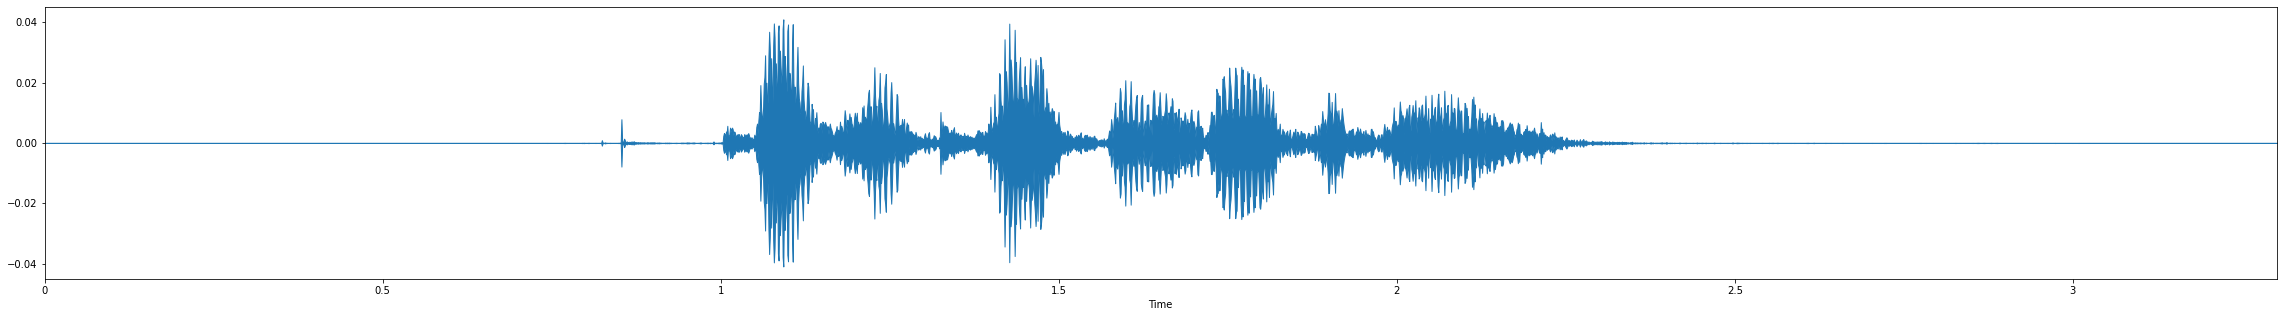

In [ ]:
# Import one audio file with librosa
data, sampling_rate = librosa.load('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')
plt.figure(figsize=(40, 5))                           # Shape of audio figure
librosa.display.waveplot(data, sr=sampling_rate)      # Show audio

In [ ]:
# Load in audio file
y, sr = librosa.load('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')
yt,_=librosa.effects.trim(y)                          # Trim leading and trailing silence from an audio signal.

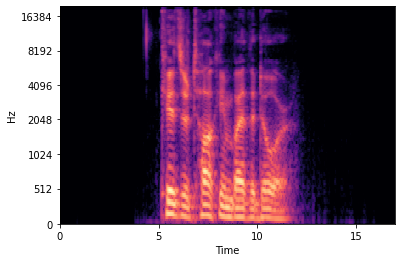

In [ ]:
# Converting the sound clips into a melspectogram with librosa
# A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale
audio_spectogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)

# Convert a power spectrogram (amplitude squared) to decibel (dB) units with power_to_db
audio_spectogram = librosa.power_to_db(audio_spectogram, ref=np.max)

# Display the spectrogram with specshow
librosa.display.specshow(audio_spectogram, y_axis='mel', fmax=20000, x_axis='time')

# Extract features from audio using librosa

In [ ]:
for actor in glob.glob(AUDIO_FOLDER):               # Loop through each actor in the data set
  for name in glob.glob(actor +'/*'):               # Go through each audio file in each of the actors datasets
    print(name[-18:-16])                            # Sanity check: Check for name of file
    emotion = label.get_emotion(name[-24:])         # From audio file naming convention get the emotion of the data
    print(emotion)                                  # Sanity check: Check emotion name

In [ ]:
# Dictionary with the numerical value that corresponds to each emotion
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [ ]:
'''
counts = {}
for actor in glob.glob(AUDIO_FOLDER):               # Loop through each actor in the data set
  for audioFile in glob.glob(actor +'/*'):          # Loop over each audio file in that directory
    emotion=dicts[audioFile[-18:-16]]               # Returns numbers from the audio file name, using the dictionary mapping each numerical value to emotions
    save_path_train = OUTPUT_FOLDER_TRAIN + emotion # Create new file name
    save_path_test = OUTPUT_FOLDER_TEST + emotion   # Create new file name
    # Convert to melspectrogram
    y, sr = librosa.load(audioFile)                 # Load the file with librosa
    yt,_=librosa.effects.trim(y)                    # Trim leading and trailing silence from an audio signal.
    y=yt
    # Create spectrogram from audio file
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time')

    # Logic to split up test and train data
    count = counts.get(emotion, 1)
    if (count % 8 == 0):
      p = os.path.join(save_path_test, "{}{}.jpg".format(emotion, str(count).zfill(6)))
    else:
      p = os.path.join(save_path_train, "{}{}.jpg".format(emotion, str(count).zfill(6)))
    counts[emotion] = count + 1

    # Save to the aforementioned path
    plt.savefig(p)
    #print("Done!")
  print("Done actor!", actor)
  '''

'\ncounts = {}\nfor actor in glob.glob(AUDIO_FOLDER):               # Loop through each actor in the data set \n  for audioFile in glob.glob(actor +\'/*\'):          # Loop over each audio file in that directory\n    emotion=dicts[audioFile[-18:-16]]               # Returns numbers from the audio file name, using the dictionary mapping each numerical value to emotions \n    save_path_train = OUTPUT_FOLDER_TRAIN + emotion # Create new file name\n    save_path_test = OUTPUT_FOLDER_TEST + emotion   # Create new file name\n    # Convert to melspectrogram\n    y, sr = librosa.load(audioFile)                 # Load the file with librosa\n    yt,_=librosa.effects.trim(y)                    # Trim leading and trailing silence from an audio signal.          \n    y=yt\n    # Create spectrogram from audio file\n    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)\n    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)\n    librosa.display.specshow(mel_spect,

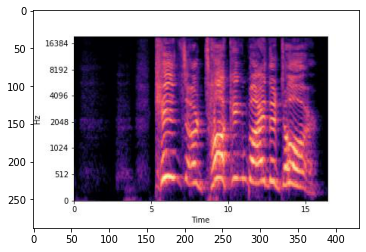

In [ ]:
# Print one image from sorted array file
img = plt.imread('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/angry/Copy of angry000001.jpg')
plt.imshow(img)

In [ ]:
train_path = Path("/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/")
valid_path = Path("/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output test merged/")
main_path = Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/RAVDESS/audio_speech_actors_01-24/')

# List all sentiment groups
train_path.ls()

(#10) [Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/angry'),Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/calm'),Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/disgust'),Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/fearful'),Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/happy'),Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/neutral'),Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/sad'),Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/surprised'),Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/models'),Path('/content/drive/MyDrive/Speech Emotion Recognition/Da

In [ ]:
# Create from imagenet style dataset in path with train and valid subfolders (or provide valid_pct)
dls = ImageDataLoaders.from_folder(train_path, valid_pct=0.2, seed=42, num_workers=0)
dls.valid_ds.items[:10]

[Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/fearful/Copy of fearful000089.jpg'),
 Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/angry/Copy of angry000049.jpg'),
 Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/angry/Copy of angry000038.jpg'),
 Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/calm/Copy of calm000150.jpg'),
 Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/calm/Copy of calm000041.jpg'),
 Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/happy/Copy of happy000046.jpg'),
 Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/happy/Copy of happy000066.jpg'),
 Path('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/f

In [ ]:
# Showcase the sentiment categories
dls.vocab

['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

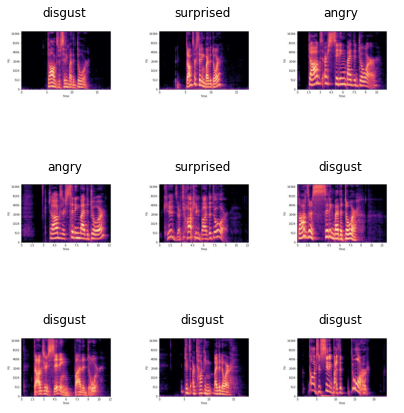

In [ ]:
# See what a sample of a batch looks like
dls.show_batch(figsize=(7,8))

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pt

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Minimum/10: 5.75e-03, steepest point: 5.25e-03


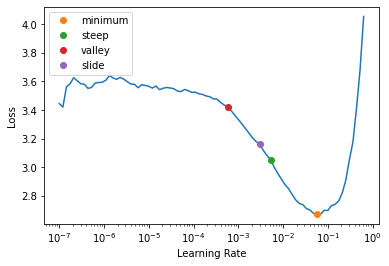

In [ ]:
# This method creates a Learner object from the data object and model inferred from it with the backbone given in base_arch.
# ResNet-34 Pre-trained Model for PyTorch
learn = cnn_learner(dls, models.resnet34, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

# Find optimum learning rate (the steepest point)
lr = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
print(f"Minimum/10: {lr.minimum:.2e}, steepest point: {lr.steep:.2e}")

Sanity Check

In [ ]:
print('learn.data.vocab', learn.dls.vocab)

NameError: ignored

In [ ]:
# Train (fit) using the optimum learning rate
learn.fit(20, float(f"{lr.steep:.2e}"))

epoch,train_loss,valid_loss,accuracy,time
0,0.202879,2.481177,0.507937,00:15
1,0.236680,2.017507,0.519841,00:14
2,0.248310,2.462754,0.563492,00:15
3,0.262210,3.155746,0.480159,00:15
4,0.275834,2.321466,0.547619,00:15
5,0.261504,2.701158,0.551587,00:15
6,0.265976,3.300612,0.388889,00:15
7,0.254383,2.139504,0.587302,00:16
8,0.238961,2.307801,0.555556,00:15
9,0.235622,2.113743,0.611111,00:15


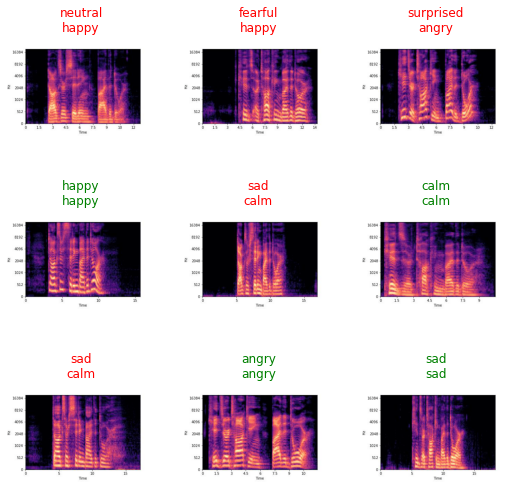

In [ ]:
# Plotting The losses for training and validation
learn.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

True

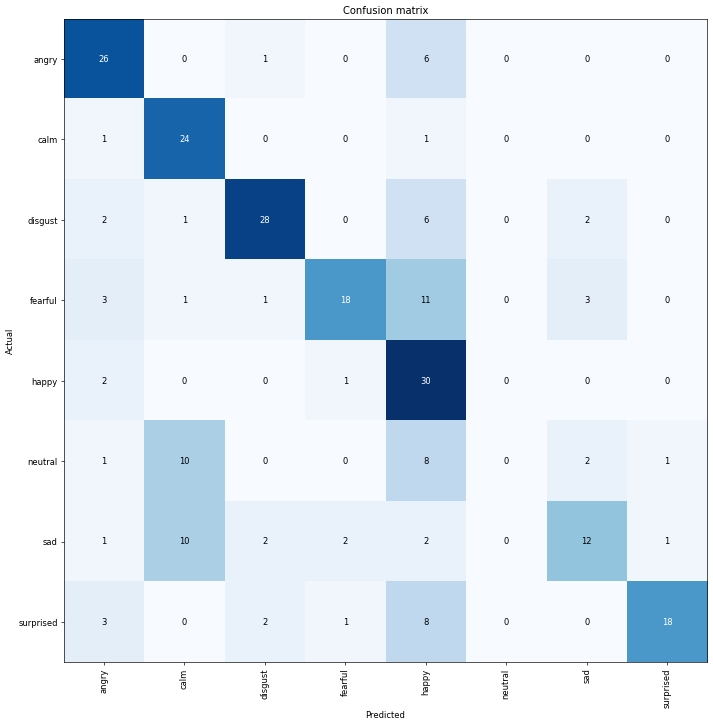

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.freeze()

In [ ]:
learn.export('speech_02.pkl')

# Live Audio

In [ ]:
model = load_learner('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Output train merged/speech_02.pkl')
print('model loaded')

model loaded


In [ ]:
'''
#!sudo apt-get install ffmpeg
!pip install pydub
# import required modules
from os import path
from pydub import AudioSegment

# assign files
input_file = "/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Live Output /Standard recording 5.mp3"
output_file = "/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Live Output /Recording 5.wav"

# convert mp3 file to wav file
sound = AudioSegment.from_mp3(input_file)
sound.export(output_file, format="wav")'''

<_io.BufferedRandom name='/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Live Output /Recording 5.wav'>

In [ ]:
'''for file in glob.iglob('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Live Output/*', recursive=True):
  # Load in audio file
  y, sr = librosa.load(file)

  yt,_=librosa.effects.trim(y)

  # Converting the sound clips into a melspectogram with librosa
  # A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale
  audio_spectogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)

  # Convert a power spectrogram (amplitude squared) to decibel (dB) units with power_to_db
  audio_spectogram = librosa.power_to_db(audio_spectogram, ref=np.max)

  # Display the spectrogram with specshow
  librosa.display.specshow(audio_spectogram, y_axis='mel', fmax=20000, x_axis='time')

  p = os.path.join('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Live images', "{}.jpg".format(str(file)))
  plt.savefig(p)'''

'for file in glob.iglob(\'/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Live Output/*\', recursive=True):\n  # Load in audio file\n  y, sr = librosa.load(file)\n\n  yt,_=librosa.effects.trim(y)\n\n  # Converting the sound clips into a melspectogram with librosa\n  # A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale\n  audio_spectogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)\n\n  # Convert a power spectrogram (amplitude squared) to decibel (dB) units with power_to_db\n  audio_spectogram = librosa.power_to_db(audio_spectogram, ref=np.max)\n\n  # Display the spectrogram with specshow\n  librosa.display.specshow(audio_spectogram, y_axis=\'mel\', fmax=20000, x_axis=\'time\')\n\n  p = os.path.join(\'/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Live images\', "{}.jpg".format(str(file)))\n  plt.savefig(p)'

In [ ]:
live_pred = plt.imread('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Live images/Recording 1.wav.jpg')
#plt.imshow(live_pred)
emotion_live = model.predict(live_pred)[0]
print("Predicted Emotion: ",emotion_live)

Predicted Emotion:  calm


In [ ]:
live_pred = plt.imread('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Live images/Recording 2.wav.jpg')
#plt.imshow(live_pred)
emotion_live = model.predict(live_pred)[0]
print("Predicted Emotion: ",emotion_live)

Predicted Emotion:  calm


In [ ]:
live_pred = plt.imread('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Live images/Recording 3.wav.jpg')
#plt.imshow(live_pred)
emotion_live = model.predict(live_pred)[0]
print("Predicted Emotion: ",emotion_live)

Predicted Emotion:  disgust


In [ ]:
live_pred = plt.imread('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Live images/Recording 4.wav.jpg')
#plt.imshow(live_pred)
emotion_live = model.predict(live_pred)[0]
print("Predicted Emotion: ",emotion_live)

Predicted Emotion:  disgust


In [ ]:
live_pred = plt.imread('/content/drive/MyDrive/Speech Emotion Recognition/Dataset/Actor 1-24/Live images/Recording 5.wav.jpg')
#plt.imshow(live_pred)
emotion_live = model.predict(live_pred)[0]
print("Predicted Emotion: ",emotion_live)

Predicted Emotion:  calm
